# Microscopic_image_processing

## 1. Required Packages and Data

In [121]:
# Importing libraries
from scipy import misc, ndimage
from skimage import io, data, color
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

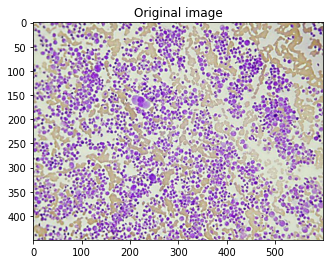

In [122]:
# Importing data
img = io.imread('bonemarrow.jpg')
plt.title('Original image')
plt.imshow(img, cmap = 'gray')
img = color.rgb2gray(img)

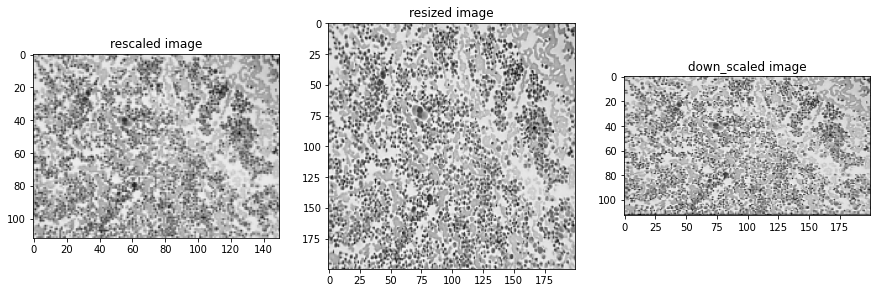

In [64]:
# Resizing images
from skimage.transform import rescale, resize, downscale_local_mean

# rescaling
img_rescaled = rescale(img, 1.0/4.0, anti_aliasing = True)

# resizing
img_resized = resize(img, (200,200))

# downscaling
img_downscaled = downscale_local_mean(img, (4,3))

# show result
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))

ax0.set_title('rescaled image')
ax0.imshow(img_rescaled, cmap = 'gray')

ax1.set_title('resized image')
ax1.imshow(img_resized, cmap = 'gray')

ax2.set_title('down_scaled image')
ax2.imshow(img_downscaled, cmap = 'gray')

### 2. Edge Filtering

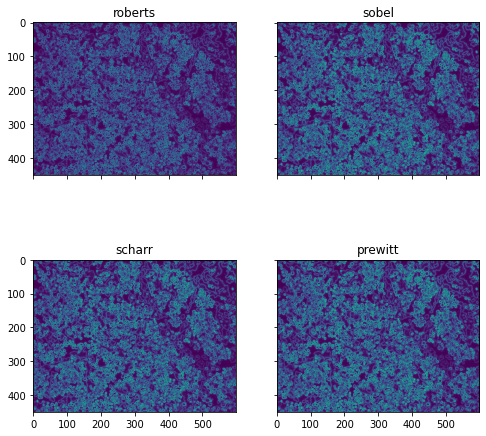

In [81]:
from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

# show result
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = True,
                         sharey = True, figsize=(8,8))

ax = axes.ravel()

ax[0].set_title('roberts')
ax[0].imshow(edge_roberts)

ax[1].set_title('sobel')
ax[1].imshow(edge_sobel)

ax[2].set_title('scharr')
ax[2].imshow(edge_scharr)

ax[3].set_title('prewitt')
ax[3].imshow(edge_prewitt)


### 3. Canny edge detector

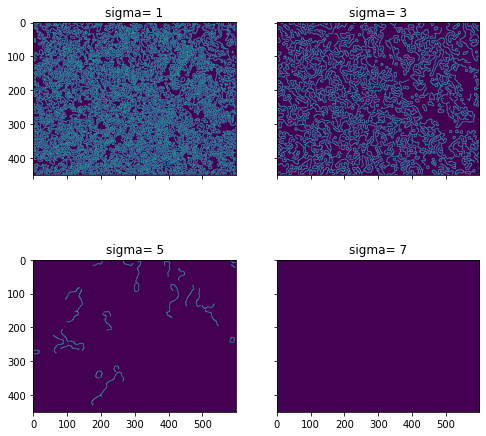

In [87]:
from skimage.feature import canny
edge_canny_1 = canny(img, sigma = 1)
edge_canny_3 = canny(img, sigma = 3)
edge_canny_5 = canny(img, sigma = 5)
edge_canny_7 = canny(img, sigma = 7)
# show result
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = True,
                         sharey = True, figsize=(8,8))
plt.title('Canny edge detector')
ax = axes.ravel()

ax[0].set_title('sigma= 1')
ax[0].imshow(edge_canny_1)

ax[1].set_title('sigma= 3')
ax[1].imshow(edge_canny_3)

ax[2].set_title('sigma= 5')
ax[2].imshow(edge_canny_5)

ax[3].set_title('sigma= 7')
ax[3].imshow(edge_canny_7)


### 4. Deconvolution
> The result would be sharper. 

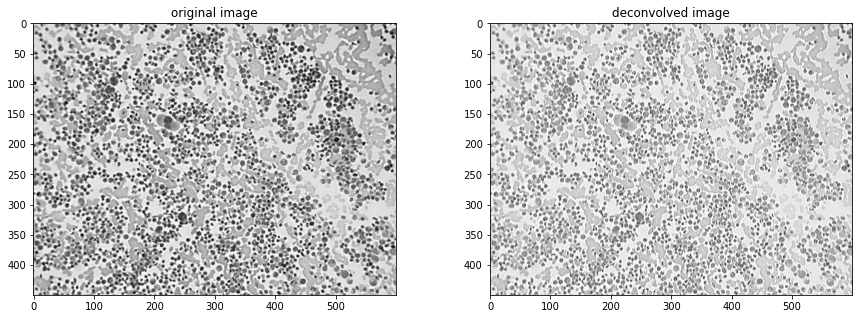

In [118]:
from skimage import restoration
psf = np.ones((3,3))/9

img_deconvolved_1, _ = restoration.unsupervised_wiener(img, psf)

# show result
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))

ax0.set_title('original image')
ax0.imshow(img, cmap = 'gray')

ax1.set_title('deconvolved image')
ax1.imshow(img_deconvolved, cmap = 'gray')

### 5. Deconvolution by a Gaussian kernel

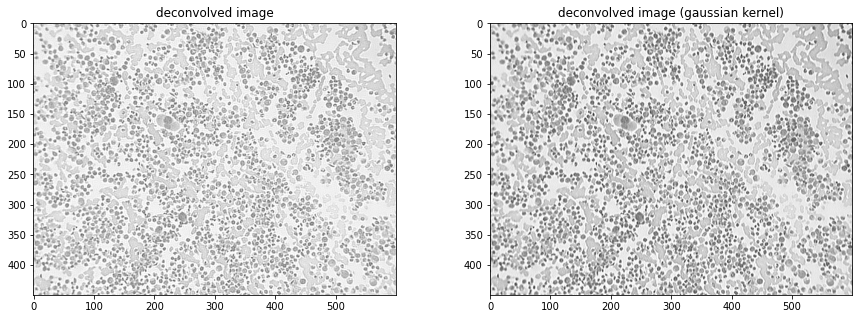

In [119]:
import scipy.stats as st
# defining a 2D Gaussian kernel
def gkern(kernlen = 21, nsig = 2):
    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern1d/kern2d.sum()

psf = gkern(5,3) # kernel length=(5,5) and sigma=3
psf=psf.reshape(1,-1)

img_deconvolved_2, _ = restoration.unsupervised_wiener(img, psf)

# show result
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))

ax0.set_title('deconvolved image')
ax0.imshow(img_deconvolved_1, cmap = 'gray')

ax1.set_title('deconvolved image (gaussian kernel)')
ax1.imshow(img_deconvolved_2,cmap = 'gray')

 ### 6. Entropy
 > A very good method to detect an area in a image when the difference between pixels' intensity is small.

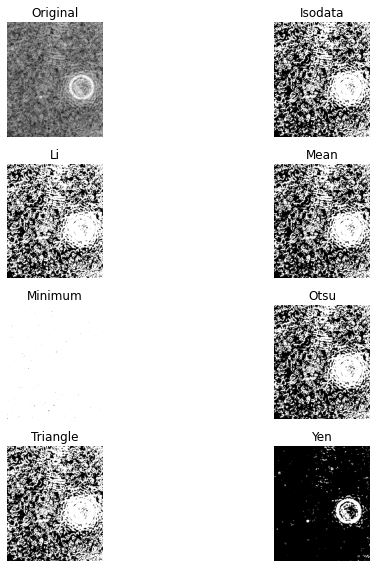

In [156]:
from skimage import data
img = data.cell()

from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(img, disk(3))

# Applying a threshold to segment these two classes
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(entropy_img, figsize = (10,8), verbose = False)


### 7. Thresholding an image
> Making a binary image by using threshold value

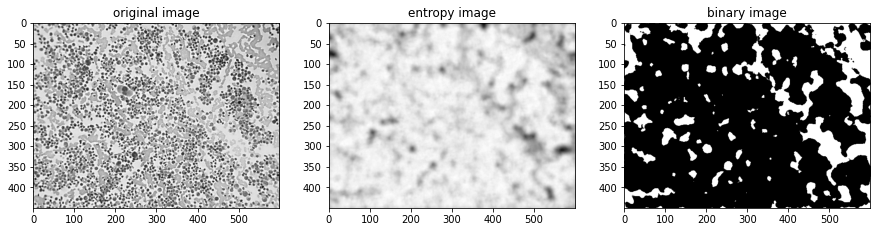

In [161]:
#img = data.coins()

img = io.imread('bonemarrow.jpg')
#plt.title('Original image')
#plt.imshow(img, cmap = 'gray')
img = color.rgb2gray(img)

from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu

entropy_img = entropy(img, disk(10))
# output: a number or one value which corresponds to the threshold for this specific image
thresh = threshold_otsu(entropy_img)
# Creating a binary image by threshold value
img_binary = entropy_img <= thresh


# show result
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))

ax0.set_title('original image')
ax0.imshow(img, cmap = 'gray')

ax1.set_title('entropy image')
ax1.imshow(entropy_img,cmap = 'gray')

ax2.set_title('binary image')
ax2.imshow(img_binary , cmap = 'gray')